In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.datasets.samples_generator import make_blobs
from sklearn.model_selection import train_test_split

from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans

from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.cluster import SpectralClustering
from sklearn.cluster import AffinityPropagation
from sklearn import metrics

from itertools import cycle

## Blob config 1

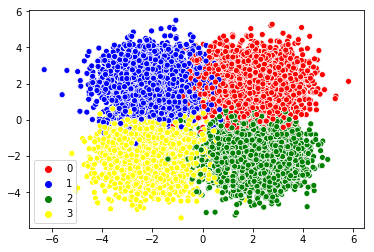

In [7]:
centers = [[2, 2], [-2, 2], [2, -2], [-2, -2]]

x, y = make_blobs(
    n_samples=10000,
    centers=centers,
    cluster_std=1,
    n_features=2,
    random_state=322)

sns.scatterplot(x[:, 0], x[:, 1], hue=y,
               palette=['red', 'blue', 'green', 'yellow'])
plt.show()

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.9, random_state=322)

### K-Means

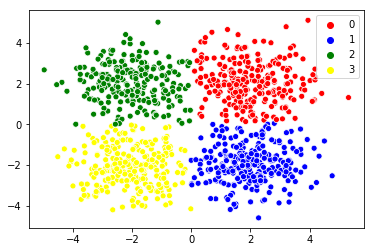

In [10]:
## K-means

## Data already normalized and two features.

km = KMeans(n_clusters=4, random_state=412)
km.fit(x_train)
km_y_pred = km.predict(x_train)
sns.scatterplot(x_train[:, 0], x_train[:, 1], hue=km_y_pred,
               palette=['red', 'blue', 'green', 'yellow'])
plt.show()

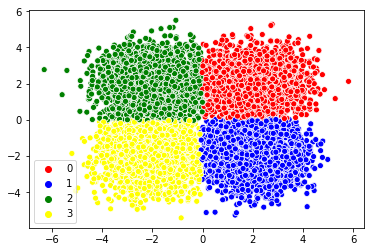

In [11]:
km_y_pred_2 = km.predict(x_test)
sns.scatterplot(x_test[:, 0], x_test[:, 1], hue=km_y_pred_2,
               palette=['red', 'blue', 'green', 'yellow'])
plt.show()

### MeanShift

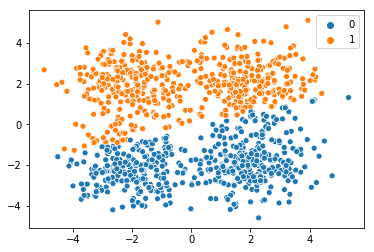

In [13]:
bandwidth = estimate_bandwidth(x_train)

ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(x_train)
ms_y_pred = ms.predict(x_train)
sns.scatterplot(x_train[:, 0], x_train[:, 1], hue=ms_y_pred)
               #palette=['red', 'blue', 'green', 'yellow'])
plt.show()

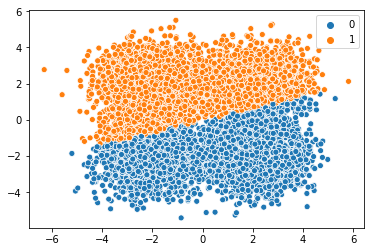

In [14]:
ms_y_pred_2 = ms.predict(x_test)
sns.scatterplot(x_test[:, 0], x_test[:, 1], hue=ms_y_pred_2)
               #palette=['red', 'blue', 'green', 'yellow'])
plt.show()

In [15]:
## Version 2

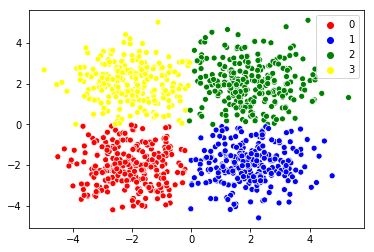

In [18]:
bandwidth = estimate_bandwidth(x_train, quantile=0.2)

ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(x_train)
ms_y_pred = ms.predict(x_train)
sns.scatterplot(x_train[:, 0], x_train[:, 1], hue=ms_y_pred,
               palette=['red', 'blue', 'green', 'yellow'])
plt.show()

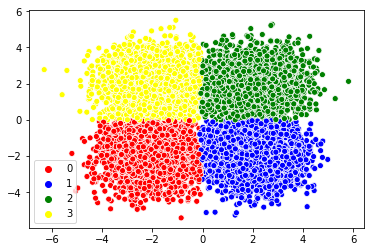

In [19]:
ms_y_pred_2 = ms.predict(x_test)
sns.scatterplot(x_test[:, 0], x_test[:, 1], hue=ms_y_pred_2,
               palette=['red', 'blue', 'green', 'yellow'])
plt.show()

### Spectral Clustering

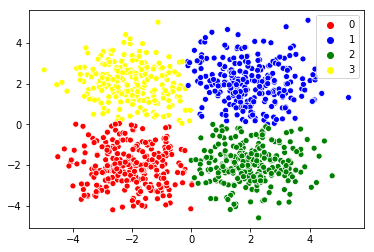

In [21]:
sc = SpectralClustering(n_clusters=4)
sc.fit(x_train)

sc_y_pred = sc.fit_predict(x_train)
sns.scatterplot(x_train[:, 0], x_train[:, 1], hue=sc_y_pred,
               palette=['red', 'blue', 'green', 'yellow'])
plt.show()

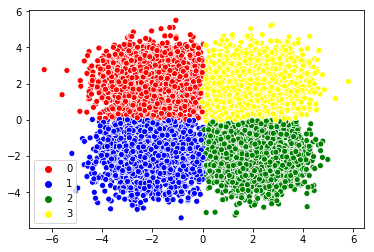

In [22]:
sc_y_pred_2 = sc.fit_predict(x_test)
sns.scatterplot(x_test[:, 0], x_test[:, 1], hue=sc_y_pred_2,
               palette=['red', 'blue', 'green', 'yellow'])
plt.show()

### Affinity propagation

In [24]:
af = AffinityPropagation().fit(x_train)

print('Estimated clusters: {}'.format(len(af.cluster_centers_indices_)))

Estimated clusters: 29


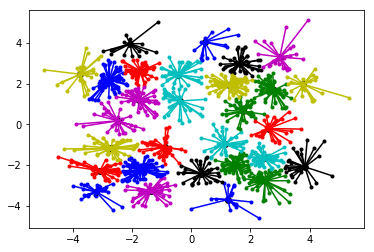

In [38]:
colors = cycle('bgrcmyk')
for k, col in zip(range(len(af.cluster_centers_indices_)), colors):
    class_members = af.labels_ == k
    cluster_center = x_train[af.cluster_centers_indices_[k]]
    plt.plot(x_train[class_members, 0], x_train[class_members, 1], col + '.')
    plt.plot(cluster_center[0],
             cluster_center[1],
             'o',
             markerfacecolor=col,
             markeredgecolor='k')
    for x in x_train[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)
plt.show()

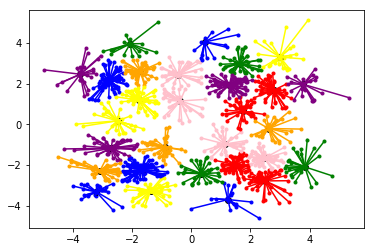

In [56]:
colors = cycle(['blue', 'red', 'orange', 'pink', 'yellow', 'purple', 'green'])
for k, col in zip(range(len(af.cluster_centers_indices_)), colors):
    class_members = af.labels_ == k
    cluster_center = x_train[af.cluster_centers_indices_[k]]
    plt.plot(x_train[class_members, 0], x_train[class_members, 1], 
             color=col, marker='.', linestyle='')
    plt.plot(cluster_center[0],
             cluster_center[1],
             'o',
             markerfacecolor=col,
             markeredgecolor='k')
    for x in x_train[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)
plt.show()

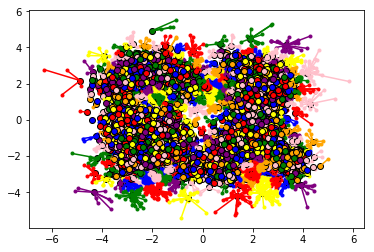

In [59]:
af = AffinityPropagation().fit(x_test)

colors = cycle(['blue', 'red', 'orange', 'pink', 'yellow', 'purple', 'green'])
for k, col in zip(range(len(af.cluster_centers_indices_)), colors):
    class_members = af.labels_ == k
    cluster_center = x_test[af.cluster_centers_indices_[k]]
    plt.plot(x_test[class_members, 0], x_test[class_members, 1], 
             color=col, marker='.', linestyle='')
    plt.plot(cluster_center[0],
             cluster_center[1],
             'o',
             markerfacecolor=col,
             markeredgecolor='k')
    for x in x_test[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)
plt.show()

## Blob config 2 - more spread out

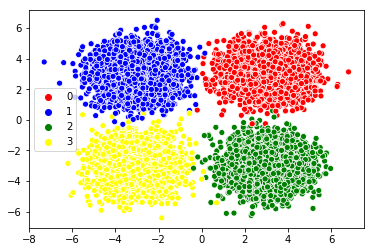

In [64]:
centers = [[3, 3], [-3, 3], [3, -3], [-3, -3]]

x, y = make_blobs(
    n_samples=10000,
    centers=centers,
    cluster_std=1,
    n_features=2,
    random_state=322)

sns.scatterplot(x[:, 0], x[:, 1], hue=y,
               palette=['red', 'blue', 'green', 'yellow'])
plt.show()

In [65]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.9, random_state=322)

### K-Means

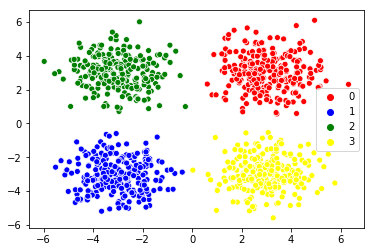

In [66]:
## K-means

## Data already normalized and two features.

km = KMeans(n_clusters=4, random_state=412)
km.fit(x_train)
km_y_pred = km.predict(x_train)
sns.scatterplot(x_train[:, 0], x_train[:, 1], hue=km_y_pred,
               palette=['red', 'blue', 'green', 'yellow'])
plt.show()

### MeanShift

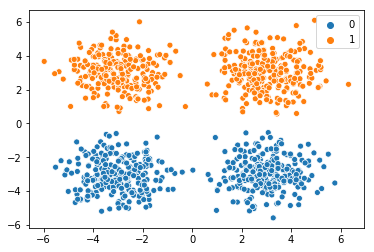

In [67]:
bandwidth = estimate_bandwidth(x_train)

ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(x_train)
ms_y_pred = ms.predict(x_train)
sns.scatterplot(x_train[:, 0], x_train[:, 1], hue=ms_y_pred)
               #palette=['red', 'blue', 'green', 'yellow'])
plt.show()

### Spectral

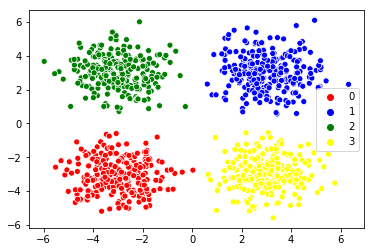

In [68]:
sc = SpectralClustering(n_clusters=4)
sc.fit(x_train)

sc_y_pred = sc.fit_predict(x_train)
sns.scatterplot(x_train[:, 0], x_train[:, 1], hue=sc_y_pred,
               palette=['red', 'blue', 'green', 'yellow'])
plt.show()

### Affinity

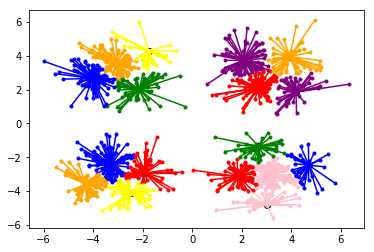

In [69]:
af = AffinityPropagation().fit(x_train)

colors = cycle(['blue', 'red', 'orange', 'pink', 'yellow', 'purple', 'green'])
for k, col in zip(range(len(af.cluster_centers_indices_)), colors):
    class_members = af.labels_ == k
    cluster_center = x_train[af.cluster_centers_indices_[k]]
    plt.plot(x_train[class_members, 0], x_train[class_members, 1], 
             color=col, marker='.', linestyle='')
    plt.plot(cluster_center[0],
             cluster_center[1],
             'o',
             markerfacecolor=col,
             markeredgecolor='k')
    for x in x_train[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)
plt.show()

## Blob config 3

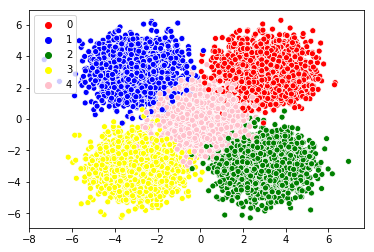

In [71]:
centers = [[3, 3], [-3, 3], [3, -3], [-3, -3], [0, 0]]

x, y = make_blobs(
    n_samples=10000,
    centers=centers,
    cluster_std=1,
    n_features=2,
    random_state=322)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.9, random_state=322)

sns.scatterplot(x[:, 0], x[:, 1], hue=y,
               palette=['red', 'blue', 'green', 'yellow', 'pink'])
plt.show()

### K-Means

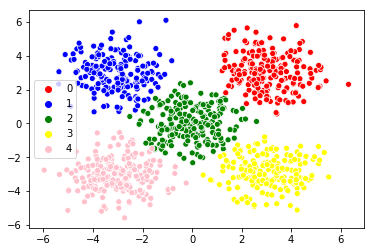

In [72]:
## K-means

## Data already normalized and two features.

km = KMeans(n_clusters=5, random_state=412)
km.fit(x_train)
km_y_pred = km.predict(x_train)
sns.scatterplot(x_train[:, 0], x_train[:, 1], hue=km_y_pred,
               palette=['red', 'blue', 'green', 'yellow', 'pink'])
plt.show()

### MeanShift

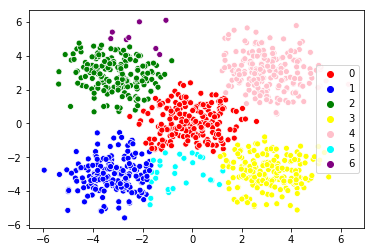

In [113]:
bandwidth = estimate_bandwidth(x_train, quantile=0.22)

ms = MeanShift(bandwidth=1.3, bin_seeding=True)
ms.fit(x_train)
ms_y_pred = ms.predict(x_train)
sns.scatterplot(x_train[:, 0], x_train[:, 1], hue=ms_y_pred,
               palette=['red', 'blue', 'green', 'yellow', 'pink', 'cyan', 'purple'])
plt.legend(loc='right')
plt.show()

### Spectral

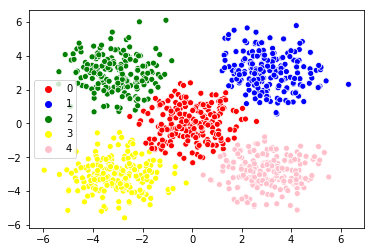

In [74]:
sc = SpectralClustering(n_clusters=5)
sc.fit(x_train)

sc_y_pred = sc.fit_predict(x_train)
sns.scatterplot(x_train[:, 0], x_train[:, 1], hue=sc_y_pred,
               palette=['red', 'blue', 'green', 'yellow', 'pink'])
plt.show()

### Affinity

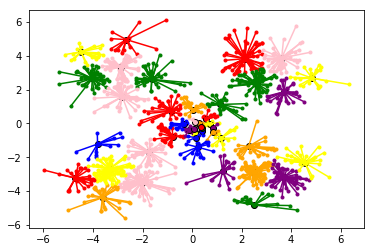

In [75]:
af = AffinityPropagation().fit(x_train)

colors = cycle(['blue', 'red', 'orange', 'pink', 'yellow', 'purple', 'green'])
for k, col in zip(range(len(af.cluster_centers_indices_)), colors):
    class_members = af.labels_ == k
    cluster_center = x_train[af.cluster_centers_indices_[k]]
    plt.plot(x_train[class_members, 0], x_train[class_members, 1], 
             color=col, marker='.', linestyle='')
    plt.plot(cluster_center[0],
             cluster_center[1],
             'o',
             markerfacecolor=col,
             markeredgecolor='k')
    for x in x_train[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)
plt.show()

In [88]:
centers = [[1.5, 1.5], [-1.5, 1.5], [1.5, -1.5], [-1.5, -1.5], [0, 0]]

x, y = make_blobs(
    n_samples=10000,
    centers=centers,
    cluster_std=1,
    n_features=2,
    random_state=322)

x_train2, x_test2, y_train2, y_test2 = train_test_split(x, y, test_size=0.7, random_state=322)

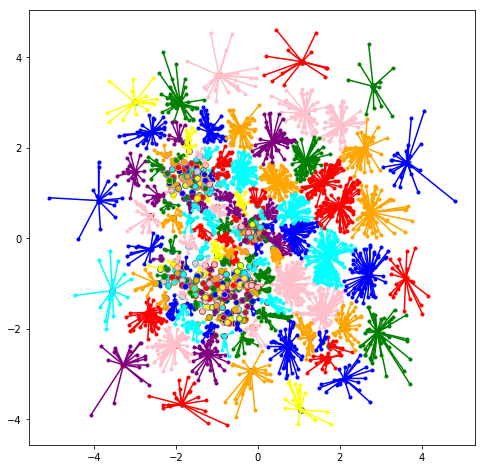

In [89]:
af = AffinityPropagation().fit(x_train2)

fig = plt.figure(figsize=(8, 8))

colors = cycle(['blue', 'red', 'orange', 'pink', 'yellow', 'purple', 'green', 'cyan'])
for k, col in zip(range(len(af.cluster_centers_indices_)), colors):
    class_members = af.labels_ == k
    cluster_center = x_train2[af.cluster_centers_indices_[k]]
    plt.plot(x_train2[class_members, 0], x_train2[class_members, 1], 
             color=col, marker='.', linestyle='')
    plt.plot(cluster_center[0],
             cluster_center[1],
             'o',
             markerfacecolor=col)
    for x in x_train2[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)
plt.show()

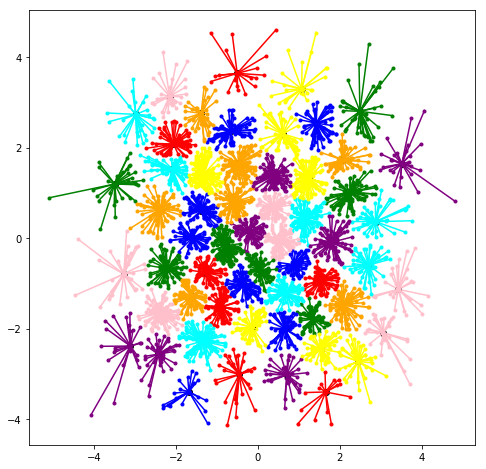

In [92]:
af = AffinityPropagation(damping=0.8).fit(x_train2)

fig = plt.figure(figsize=(8, 8))
colors = cycle(['blue', 'red', 'orange', 'pink', 'yellow', 'purple', 'green', 'cyan'])
for k, col in zip(range(len(af.cluster_centers_indices_)), colors):
    class_members = af.labels_ == k
    cluster_center = x_train2[af.cluster_centers_indices_[k]]
    plt.plot(x_train2[class_members, 0], x_train2[class_members, 1], 
             color=col, marker='.', linestyle='')
    plt.plot(cluster_center[0],
             cluster_center[1],
             'o',
             markerfacecolor=col,
             markeredgecolor='k')
    for x in x_train2[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)
plt.show()

In [93]:
centers = [[1.5, 1.5], [-1.5, 1.5], [1.5, -1.5], [-1.5, -1.5], [0, 0], [3, 1.5], [3, -1.5], [4.5, 1.5], [4.5, -1.5]]

x, y = make_blobs(
    n_samples=10000,
    centers=centers,
    cluster_std=1,
    n_features=2,
    random_state=322)

x_train2, x_test2, y_train2, y_test2 = train_test_split(x, y, test_size=0.5, random_state=322)

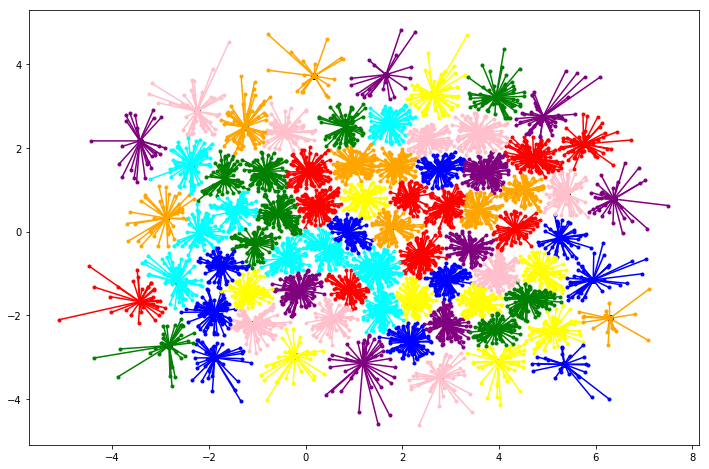

In [94]:
af = AffinityPropagation(damping=0.8).fit(x_train2)

fig = plt.figure(figsize=(12, 8))
colors = cycle(['blue', 'red', 'orange', 'pink', 'yellow', 'purple', 'green', 'cyan'])
for k, col in zip(range(len(af.cluster_centers_indices_)), colors):
    class_members = af.labels_ == k
    cluster_center = x_train2[af.cluster_centers_indices_[k]]
    plt.plot(x_train2[class_members, 0], x_train2[class_members, 1], 
             color=col, marker='.', linestyle='')
    plt.plot(cluster_center[0],
             cluster_center[1],
             'o',
             markerfacecolor=col,
             markeredgecolor='k')
    for x in x_train2[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)
plt.show()